In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport
from tpot import TPOTRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
file_path = "datasets/movie_metadata.csv"
df_movies = pd.read_csv(file_path)

In [3]:
print("Initial shape:", df_movies.shape)
print("Data types:")
print(df_movies.dtypes)

Initial shape: (5043, 28)
Data types:
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64


In [ ]:
print(df_movies.describe().T)

In [4]:
df_movies.drop(columns=['movie_imdb_link'], inplace=True, errors='ignore')
missing_values_before = df_movies.isnull().sum()
df_movies.dropna(inplace=True)
missing_values_after = df_movies.isnull().sum()

In [5]:
print("Missing values before cleaning:")
print(missing_values_before)
print("Missing values after cleaning:")
print(missing_values_after)

Missing values before cleaning:
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64
Missing values after cleaning:
color                        0
di

In [6]:
print("Shape after cleaning:", df_movies.shape)

Shape after cleaning: (3755, 27)


In [ ]:
train_data, further_training_data = train_test_split(df_movies, test_size=0.3, random_state=42)
train_data, test_data = train_test_split(train_data, test_size=0.3, random_state=42)

In [8]:
print("Train data shape:", train_data.shape)
print("Further training data shape:", further_training_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (1839, 27)
Further training data shape: (1127, 27)
Test data shape: (789, 27)


In [ ]:
numerical_cols = df_movies.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_movies.select_dtypes(include=['object']).columns

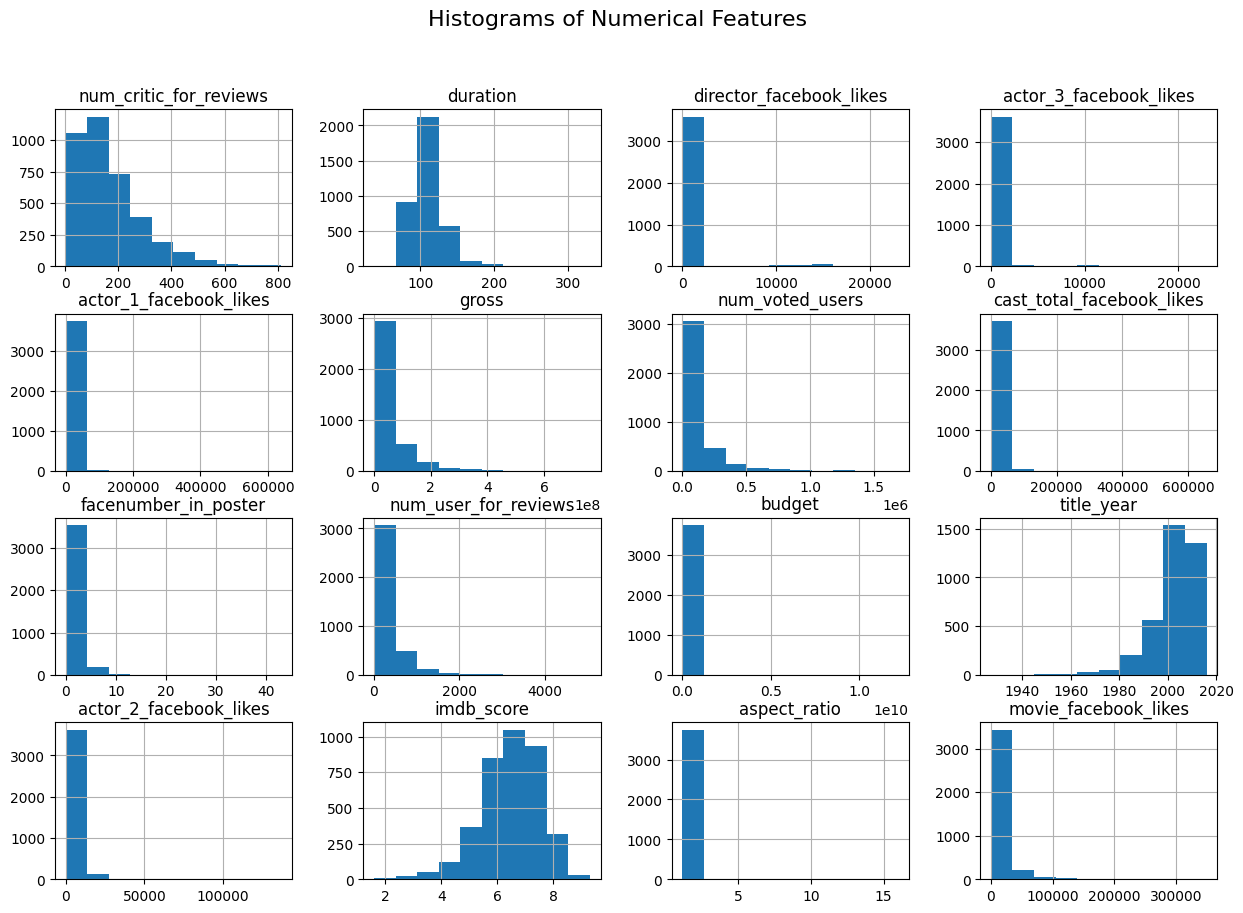

In [ ]:
df_movies[numerical_cols].hist(figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

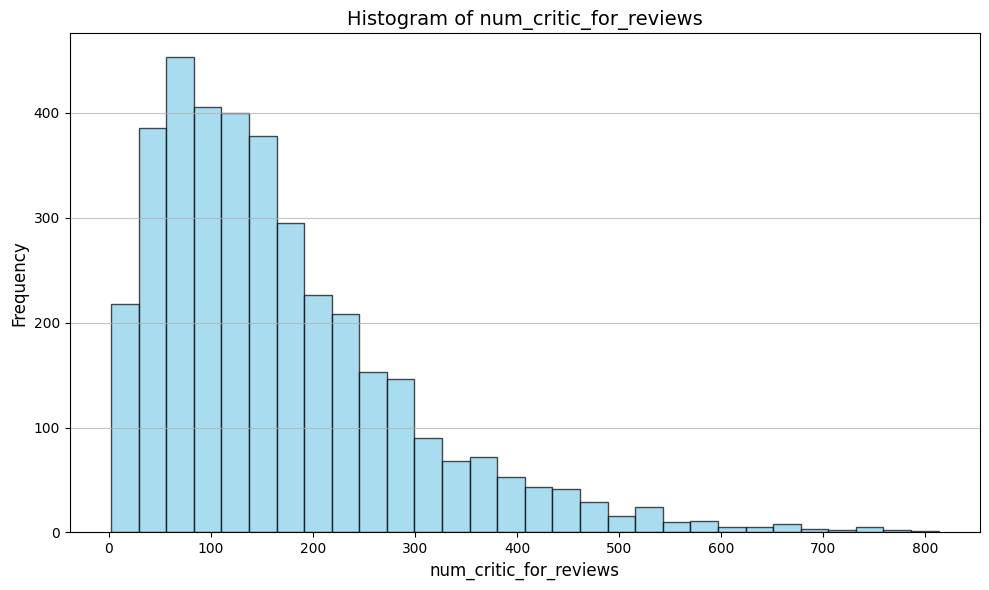

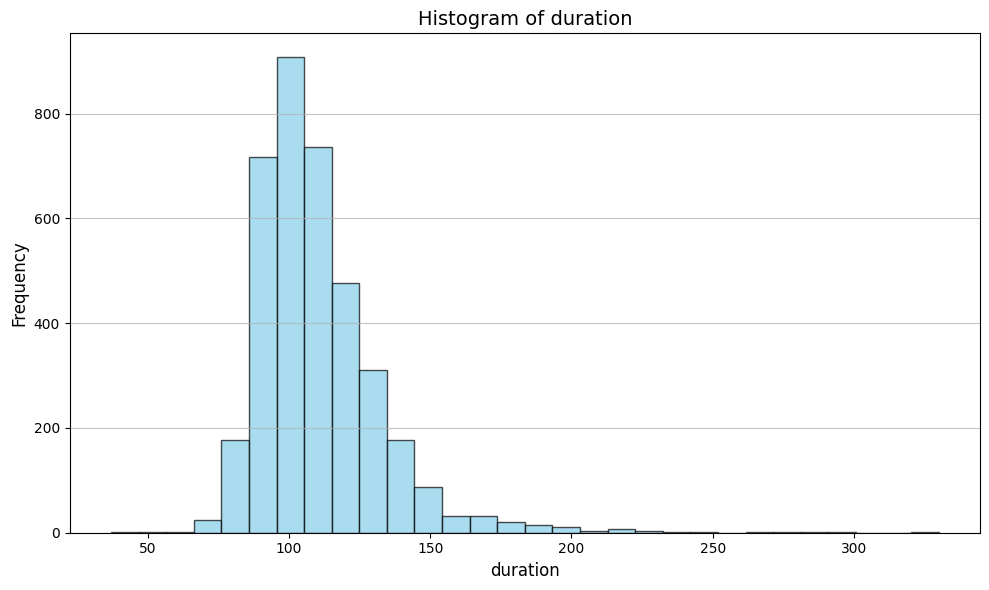

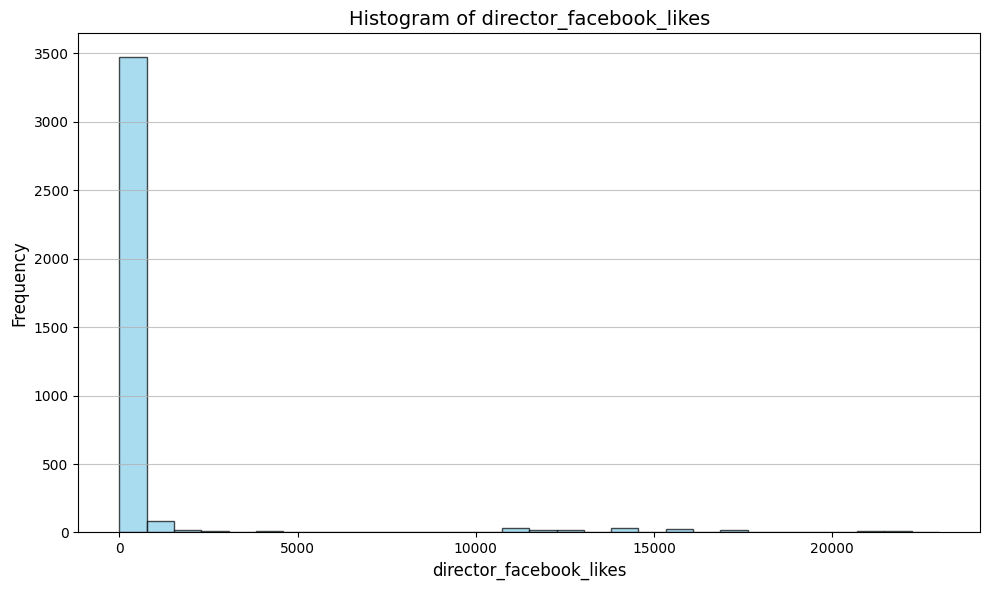

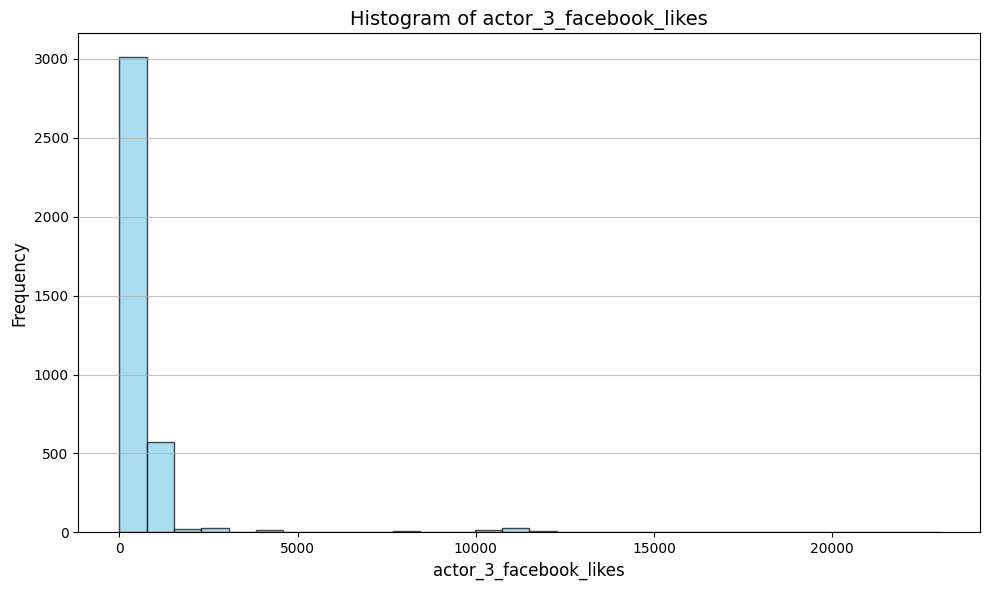

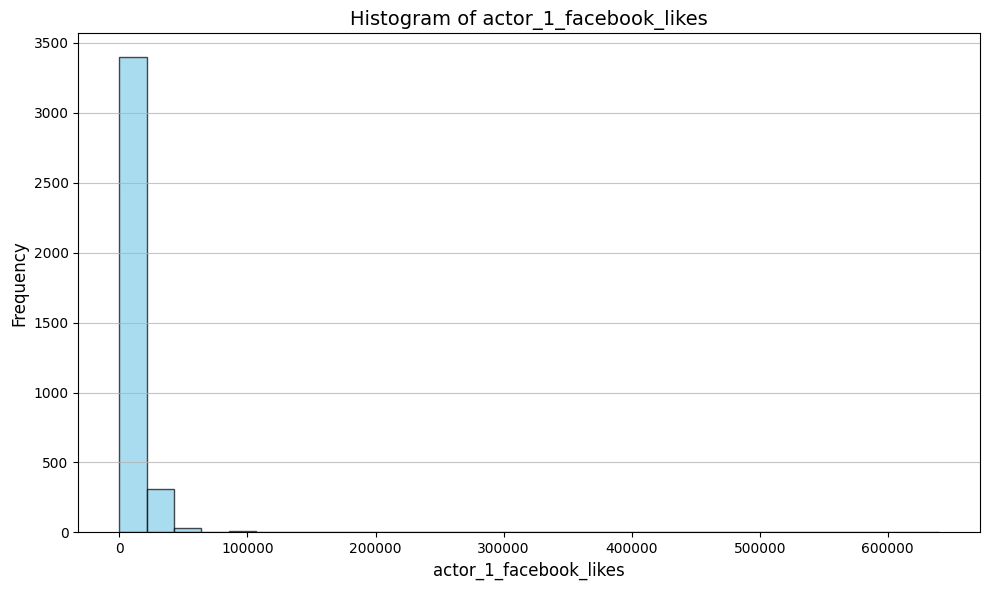

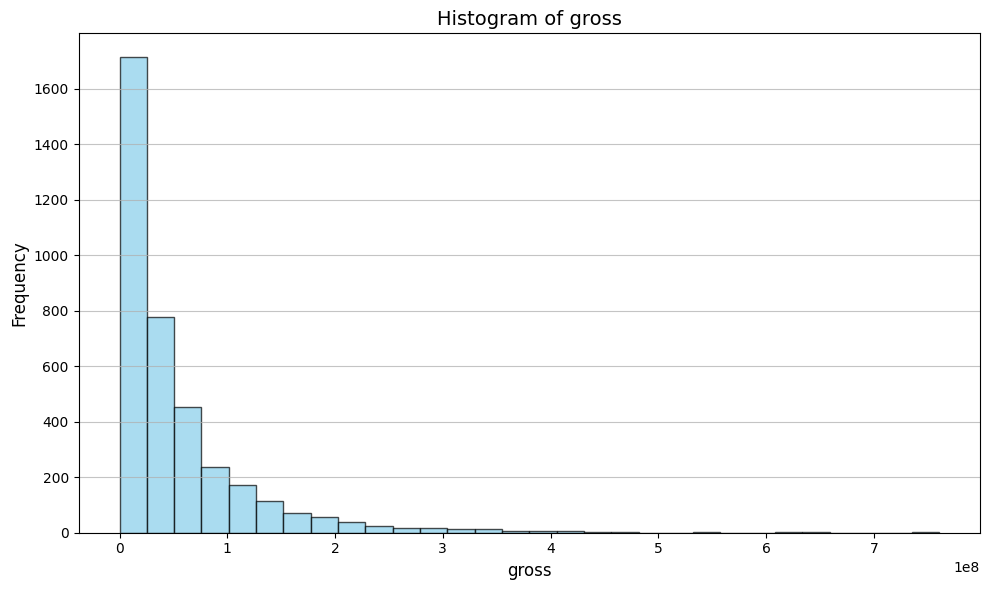

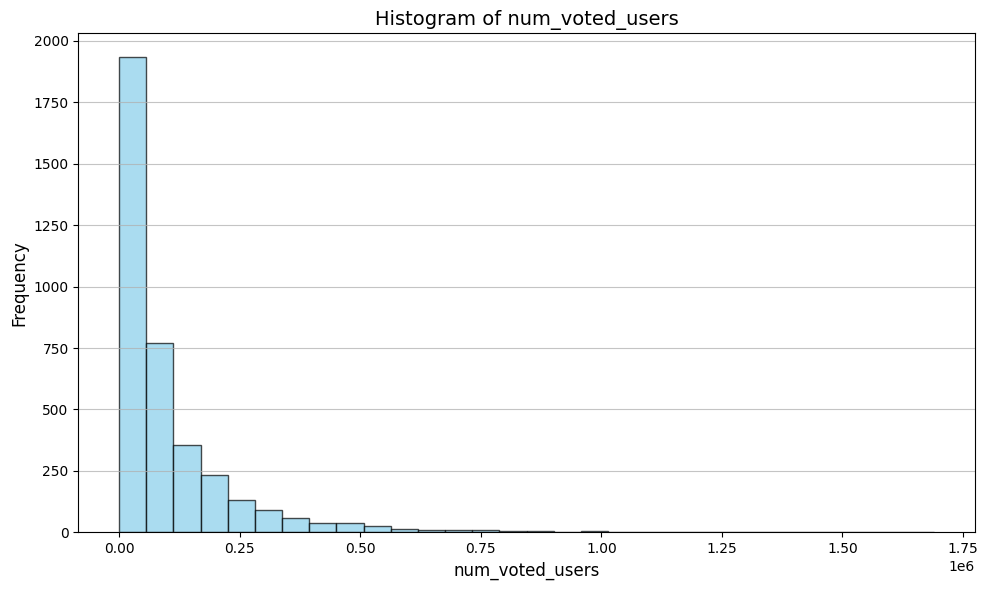

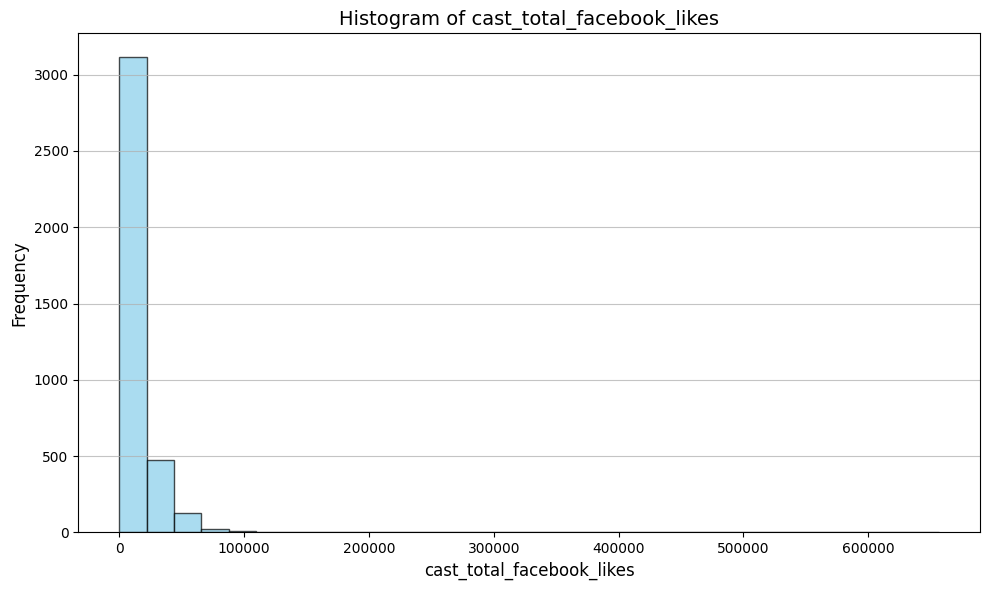

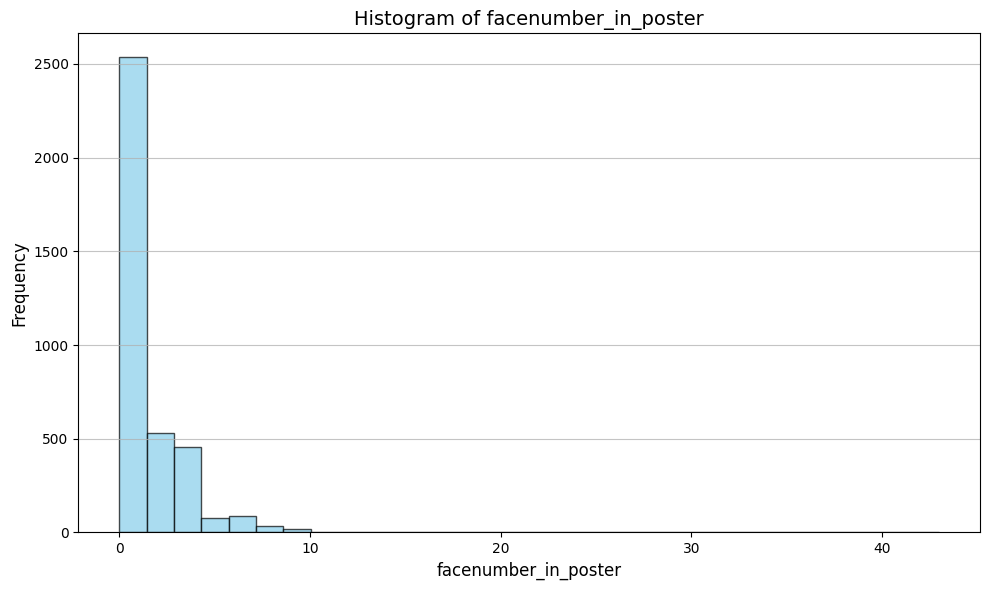

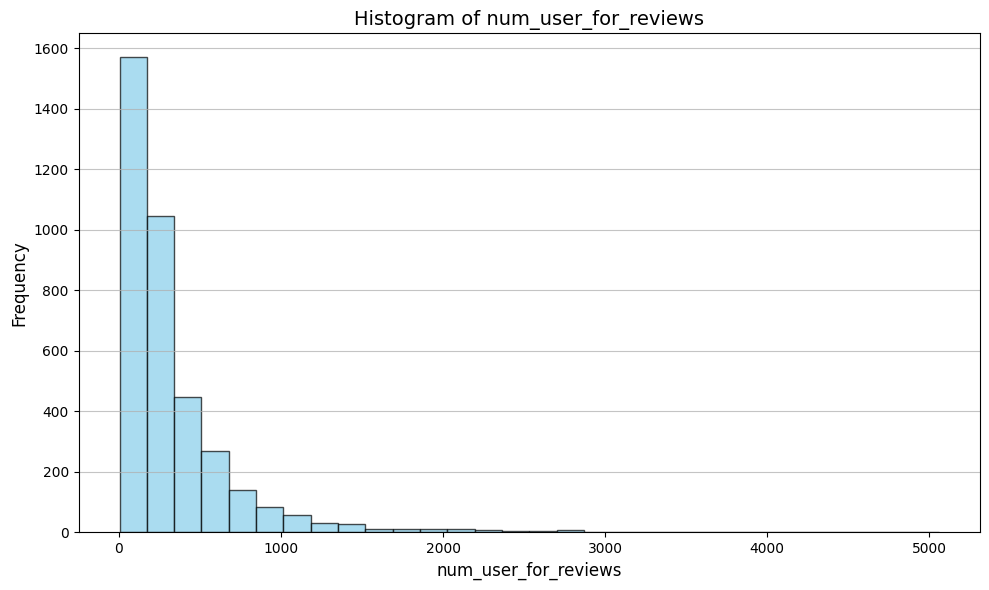

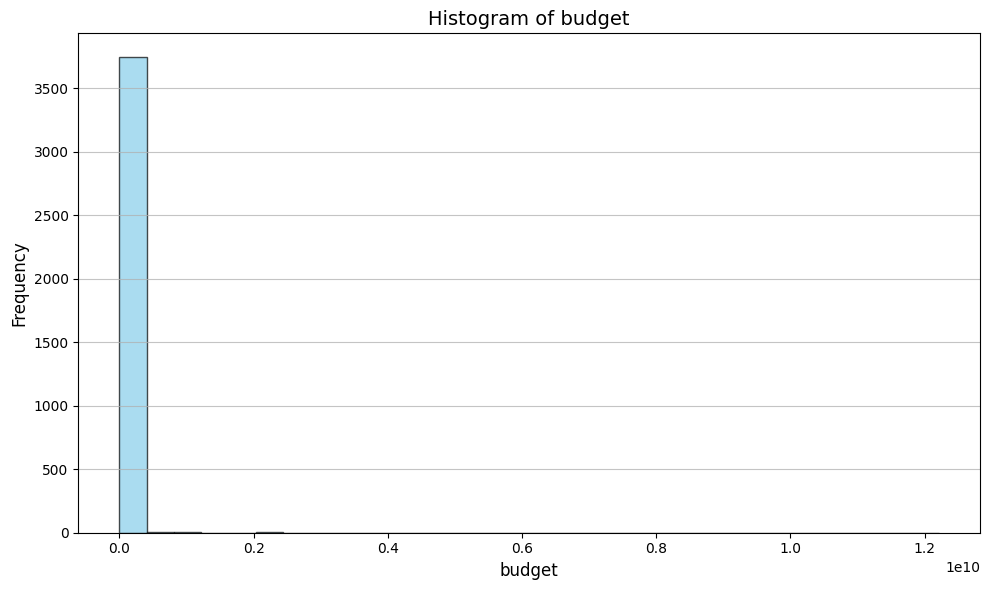

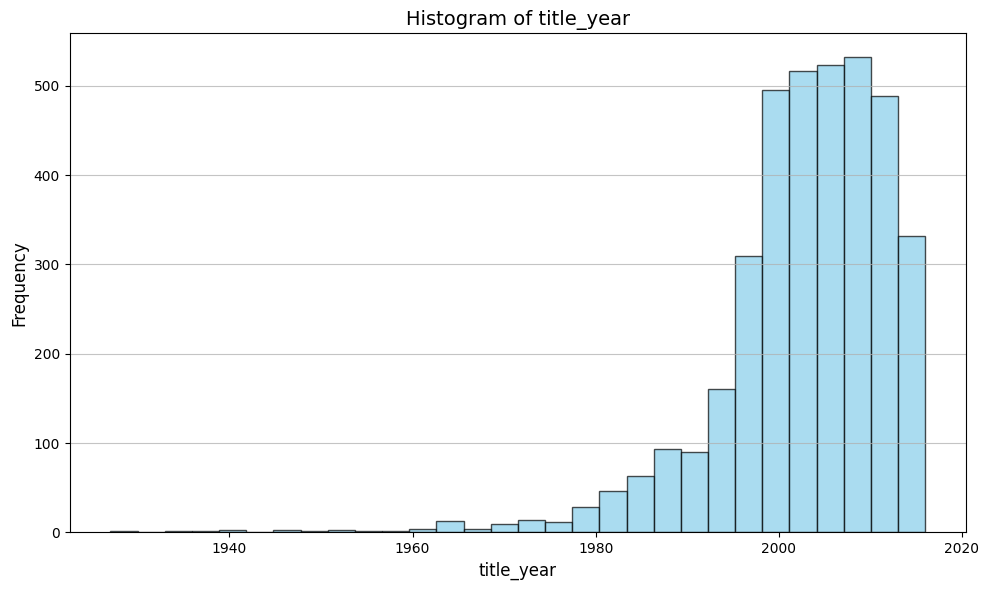

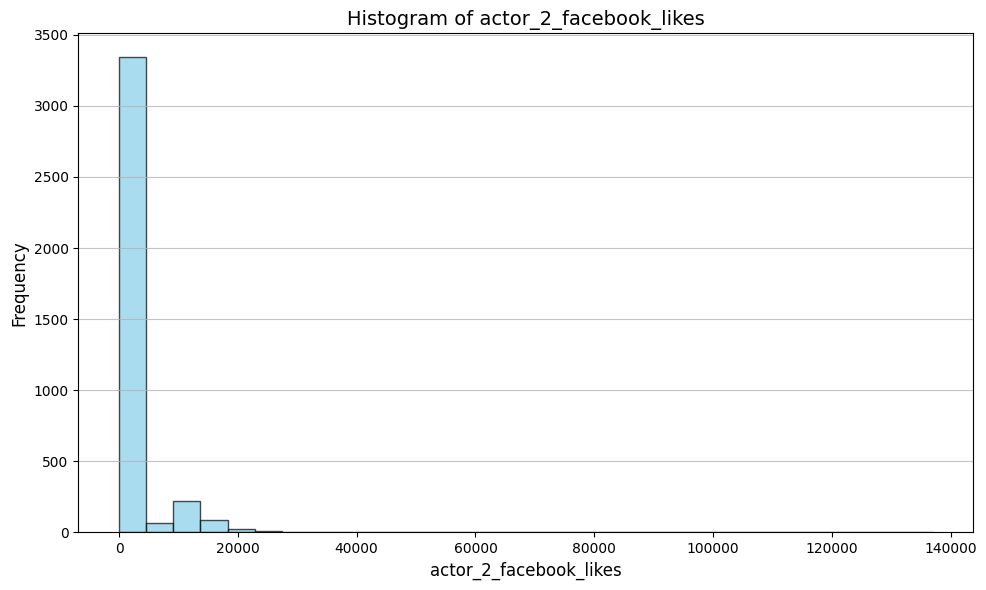

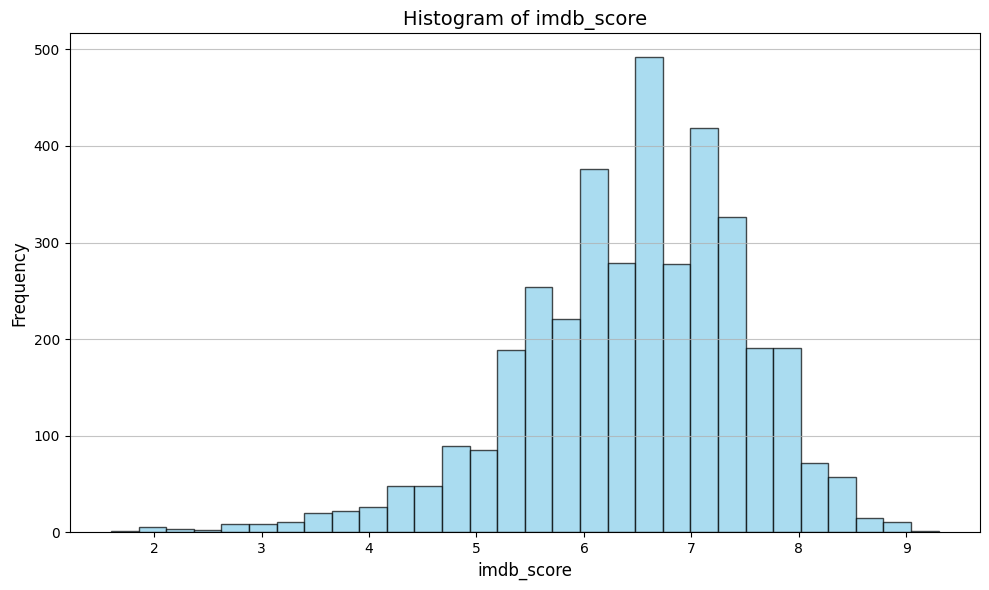

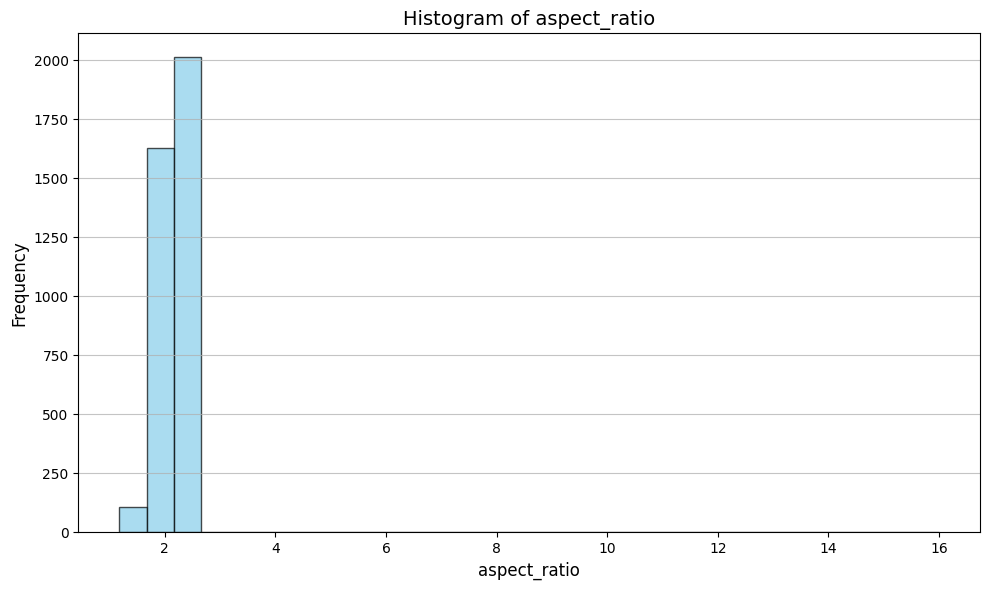

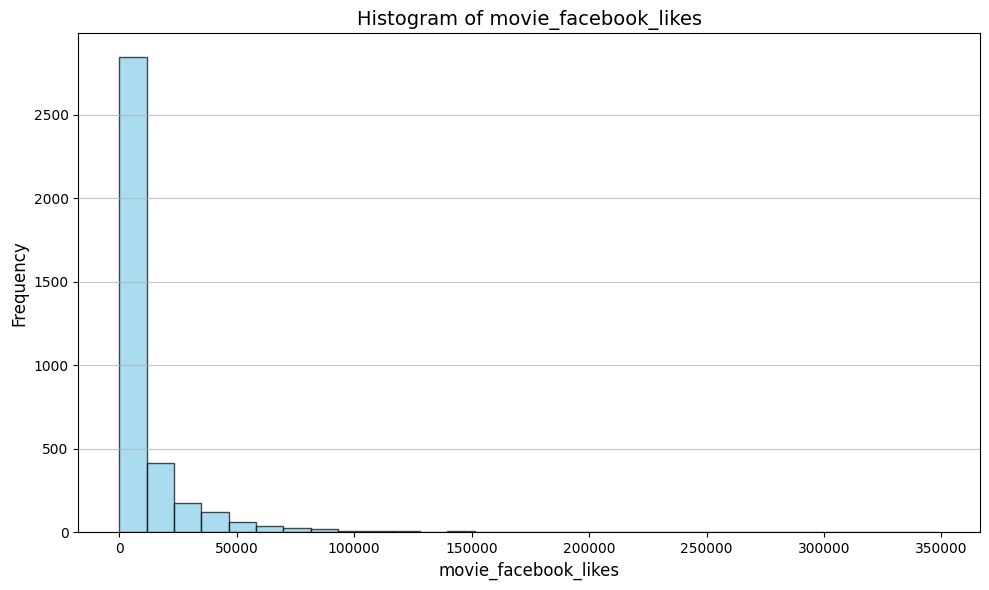

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(df_movies[col], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f"Histogram of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()


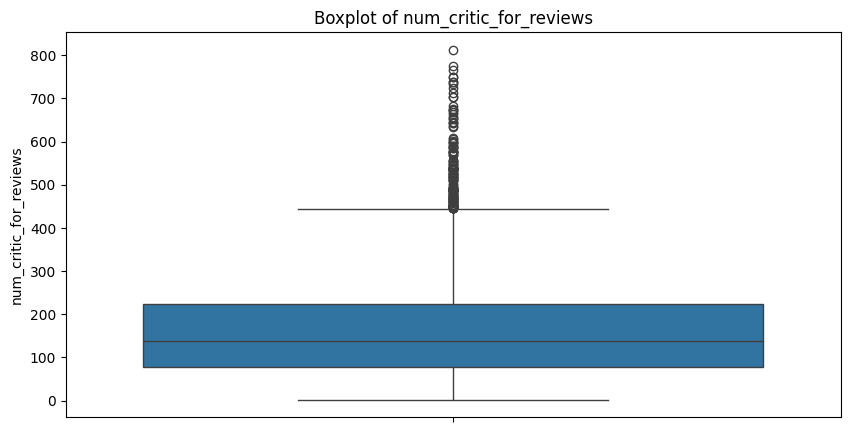

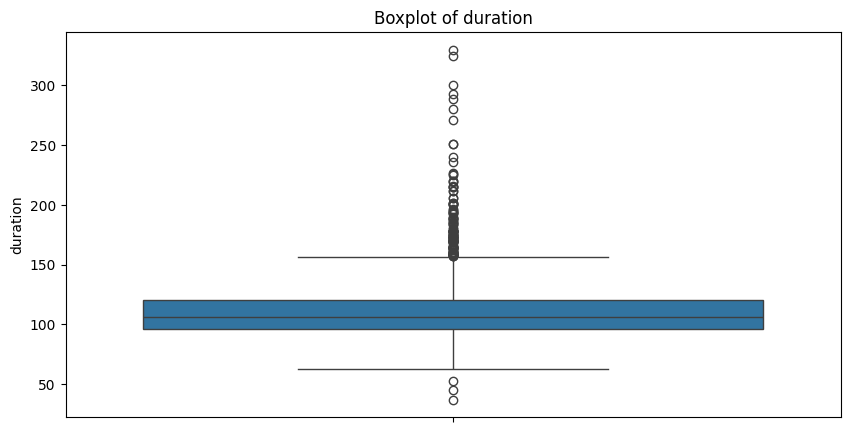

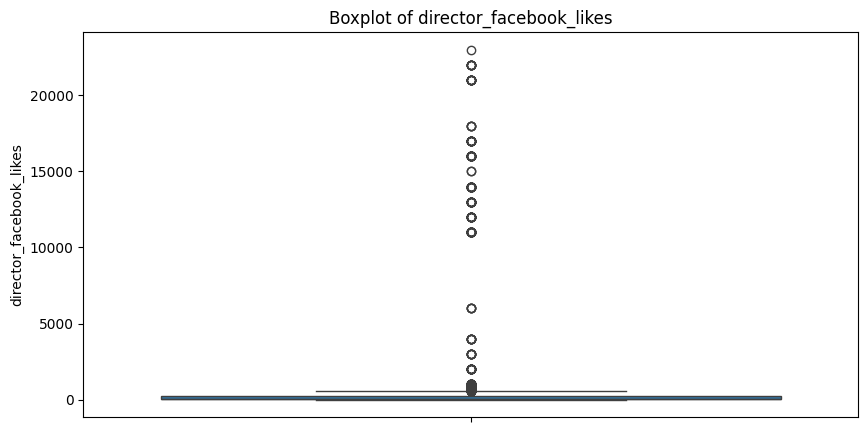

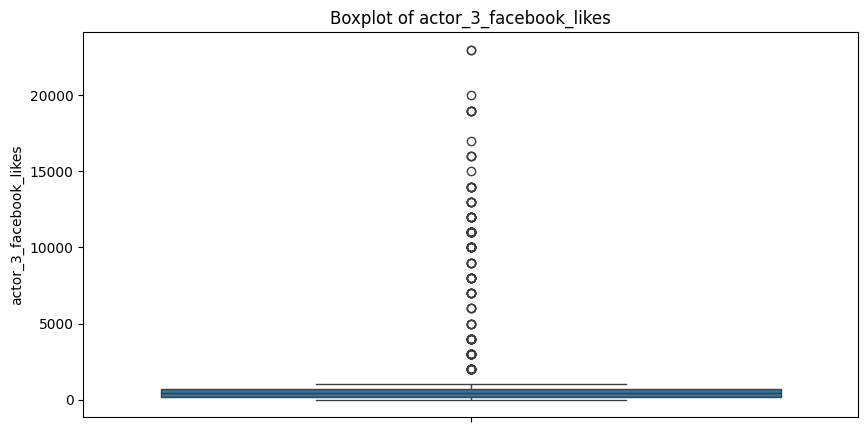

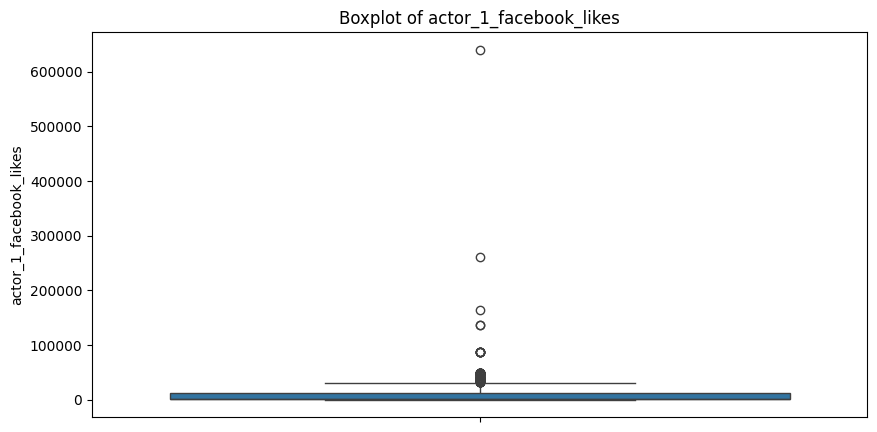

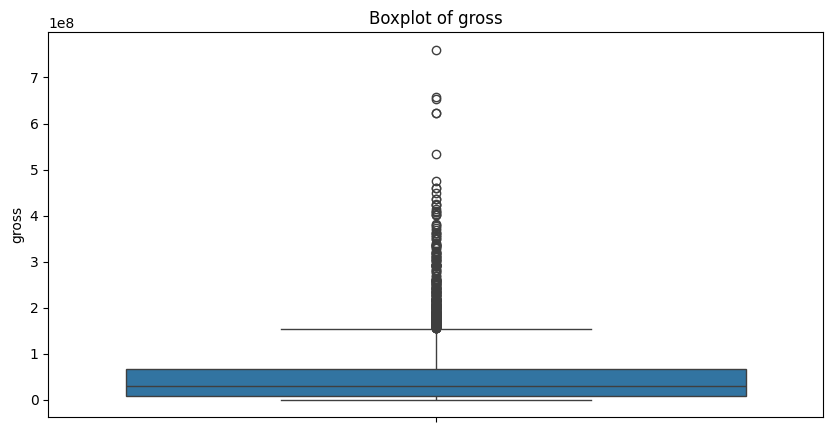

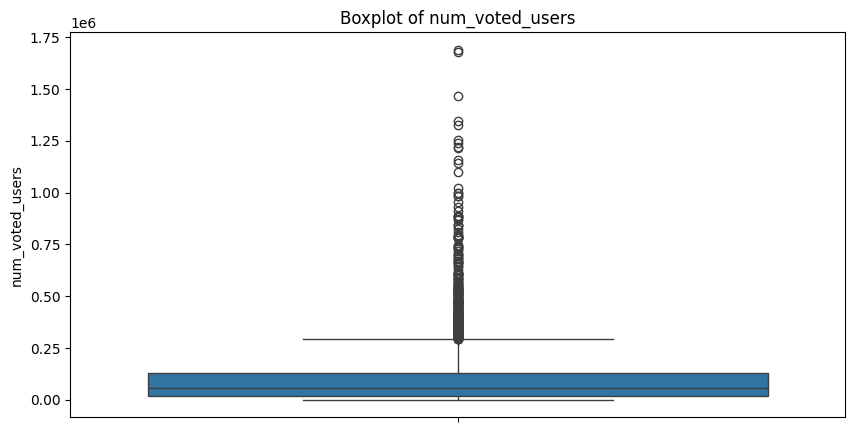

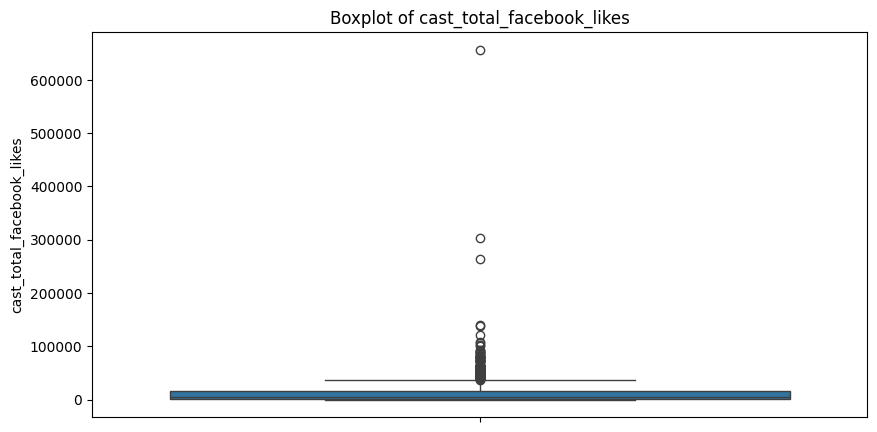

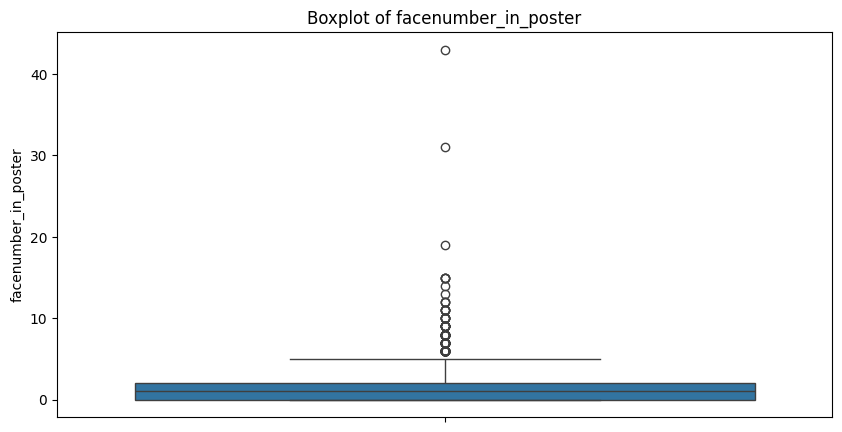

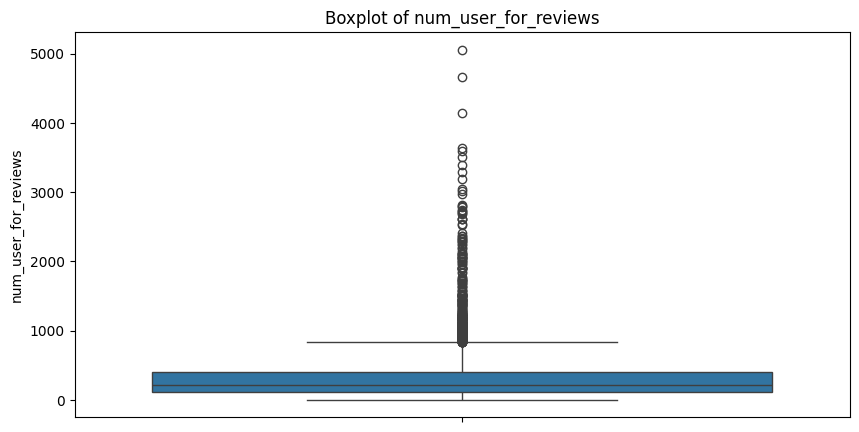

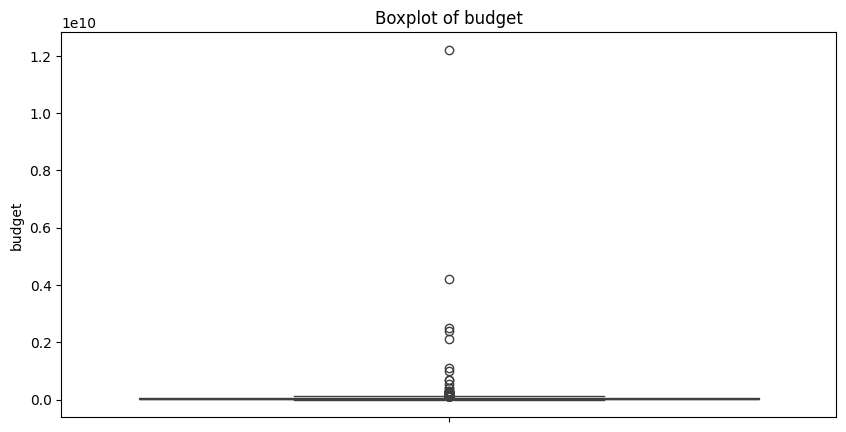

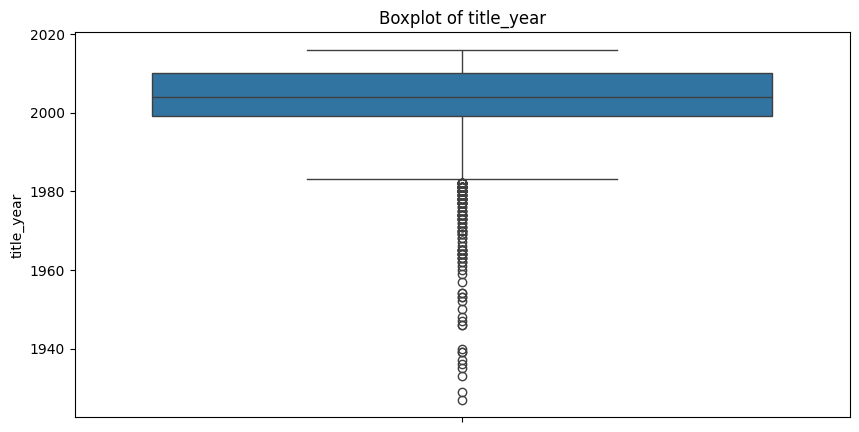

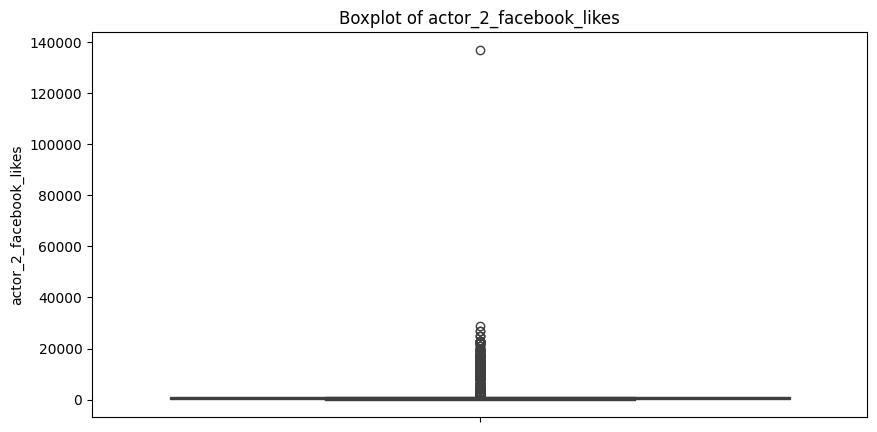

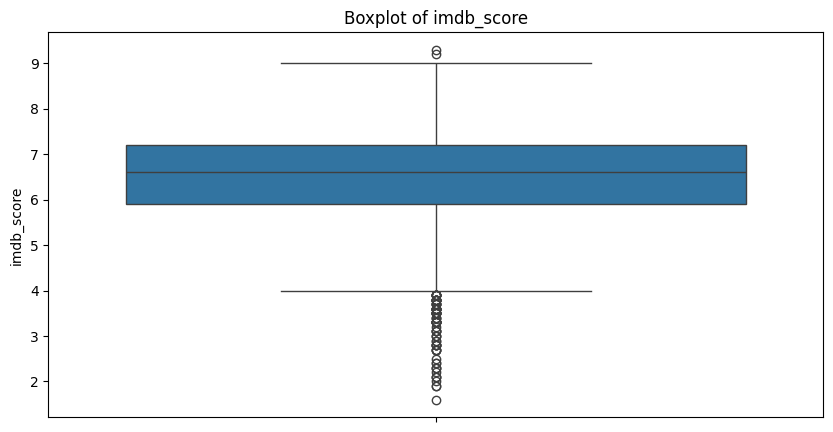

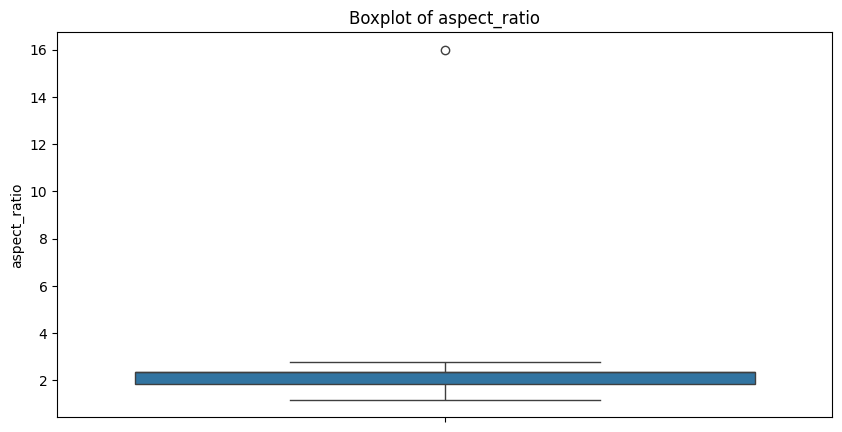

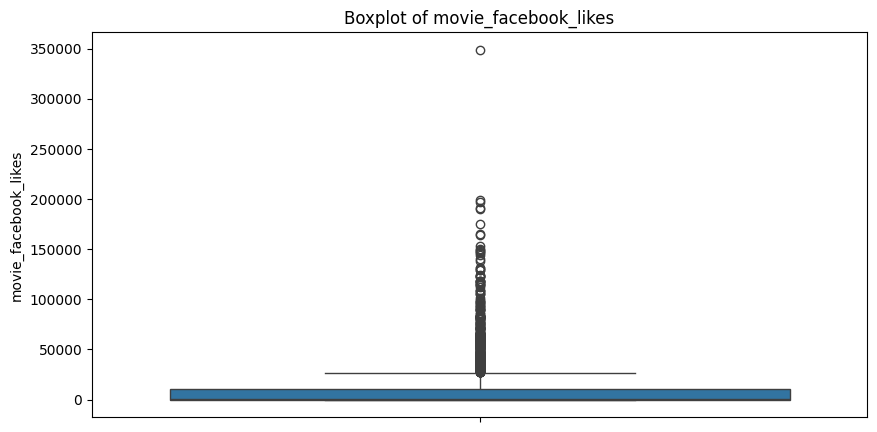

In [33]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df_movies[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


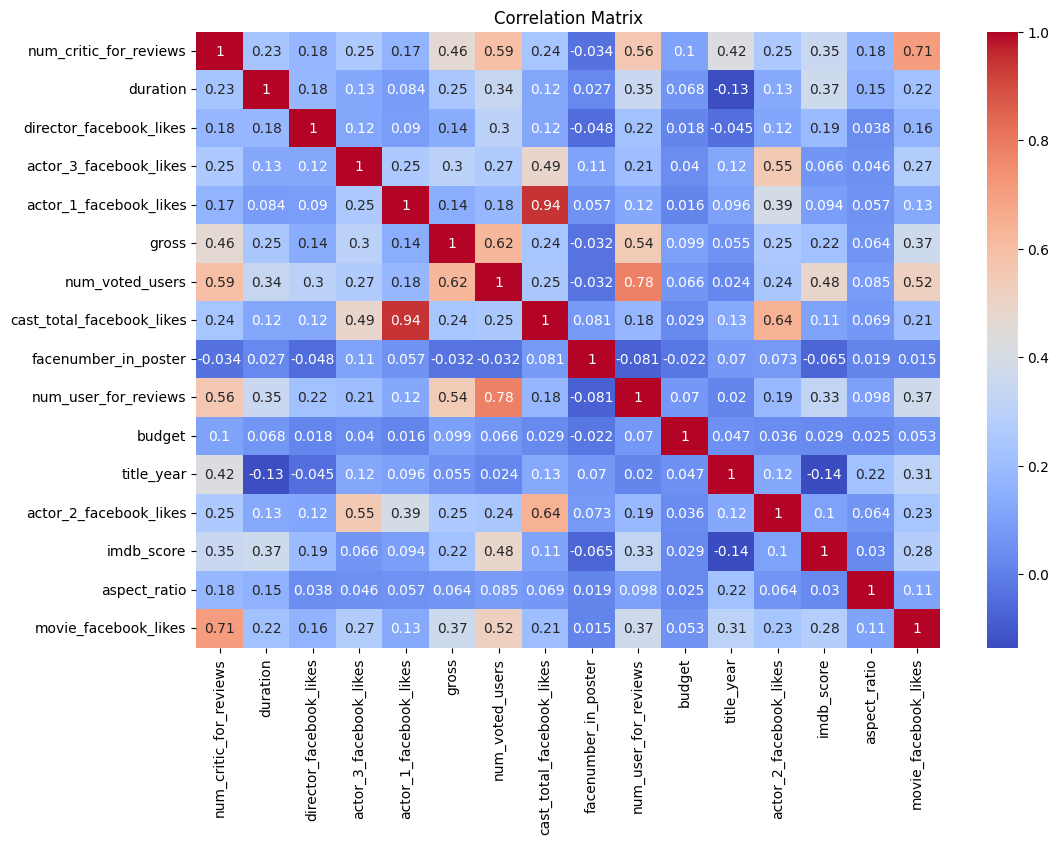

In [13]:
# Correlation matrix
correlation_matrix = df_movies[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
profile = ProfileReport(df_movies, title="Movies Data Profiling Report", explorative=True)

In [ ]:
profile.to_file("movies_data_profiling_report.html")
print("Data profiling report saved as 'movies_data_profiling_report.html'")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data profiling report saved as 'movies_data_profiling_report.html'


In [16]:
# Przygotowanie danych do AutoML (TPOT)
# Zakładamy, że przewidujemy `imdb_score`
X = df_movies.drop(columns=['imdb_score'], axis=1)
y = df_movies['imdb_score']

In [17]:
# Kodowanie zmiennych kategorycznych
X = pd.get_dummies(X, drop_first=True)

In [18]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Inicjalizacja TPOT
tpot = TPOTRegressor(
    generations=2,  
    population_size=20,  
    max_time_mins=20,
    max_eval_time_mins=3,
    verbosity=2,
    random_state=42,
    config_dict='TPOT light',
)

In [21]:
# Uruchomienie procesu AutoML
print("Uruchamianie TPOT...")
tpot.fit(X_train, y_train)

Uruchamianie TPOT...
20 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

Skipped pipeline #5 due to time out. Continuing to the next pipeline.
Skipped pipeline #8 due to time out. Continuing to the next pipeline.
Skipped pipeline #15 due to time out. Continuing to the next pipeline.
Skipped pipeline #19 due to time out. Continuing to the next pipeline.
Skipped pipeline #21 due to time out. Continuing to the next pipeline.
Skipped pipeline #32 due to time out. Continuing to the next pipeline.
Skipped pipeline #35 due to time out. Continuing to the next pipeline.

30.89 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.


TPOTRegressor(config_dict='TPOT light', generations=3, max_eval_time_mins=3,
              max_time_mins=30, population_size=30, random_state=42,
              verbosity=3)

In [22]:
# Wyświetlenie najlepszego modelu
print("Najlepszy model wygenerowany przez TPOT:")
print(tpot.fitted_pipeline_)

Najlepszy model wygenerowany przez TPOT:
Pipeline(steps=[('variancethreshold', VarianceThreshold(threshold=0.05)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=4, min_samples_leaf=13,
                                       min_samples_split=12,
                                       random_state=42))])


In [25]:
print(tpot.pareto_front_fitted_pipelines_)

{'DecisionTreeRegressor(input_matrix, DecisionTreeRegressor__max_depth=8, DecisionTreeRegressor__min_samples_leaf=6, DecisionTreeRegressor__min_samples_split=20)': Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=8, min_samples_leaf=6,
                                       min_samples_split=20,
                                       random_state=42))]), 'DecisionTreeRegressor(VarianceThreshold(input_matrix, VarianceThreshold__threshold=0.05), DecisionTreeRegressor__max_depth=4, DecisionTreeRegressor__min_samples_leaf=13, DecisionTreeRegressor__min_samples_split=12)': Pipeline(steps=[('variancethreshold', VarianceThreshold(threshold=0.05)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=4, min_samples_leaf=13,
                                       min_samples_split=12,
                                       random_state=42))])}


In [26]:
print(tpot.evaluated_individuals_)

{'KNeighborsRegressor(input_matrix, KNeighborsRegressor__n_neighbors=93, KNeighborsRegressor__p=1, KNeighborsRegressor__weights=uniform)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': np.float64(-1.1563765537249115)}, 'LinearSVR(input_matrix, LinearSVR__C=0.1, LinearSVR__dual=False, LinearSVR__epsilon=0.01, LinearSVR__loss=squared_epsilon_insensitive, LinearSVR__tol=0.1)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 1, 'internal_cv_score': np.float64(-134.0117654385526)}, 'KNeighborsRegressor(Nystroem(input_matrix, Nystroem__gamma=0.05, Nystroem__kernel=polynomial, Nystroem__n_components=1), KNeighborsRegressor__n_neighbors=76, KNeighborsRegressor__p=2, KNeighborsRegressor__weights=distance)': {'generation': 0, 'mutation_count': 0, 'crossover_count': 0, 'predecessor': ('ROOT',), 'operator_count': 2, 'internal_cv_score': np.float64(-1.120785539

In [ ]:
y_pred = tpot.predict(X_test)
r2_score = tpot.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² score on the test set: {r2_score:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R² score on the test set: -0.71
Mean Absolute Error (MAE): 0.63
Mean Squared Error (MSE): 0.71


In [24]:
# Zapisanie najlepszego modelu
tpot.export('tpot_optimized_model.py')
print("Best pipeline saved as 'tpot_optimized_model.py'")

Best pipeline saved as 'tpot_optimized_model.py'


In [ ]:
log_file = 'tpot_log.txt'
pipelines = []
with open(log_file, 'r') as f:
    for line in f:
        if 'Best pipeline so far' in line:
            parts = line.split('|')
            score = float(parts[1].strip())
            pipeline = parts[-1].strip()
            pipelines.append((score, pipeline))

pipelines.sort(reverse=True, key=lambda x: x[0])
top_3_pipelines = pipelines[:3]

print("\nTop 3 pipelines:")
for i, (score, pipeline) in enumerate(top_3_pipelines, start=1):
    print(f"{i}. R² Score: {score:.2f}")
    print(f"Pipeline: {pipeline}\n")

Średni błąd bezwzględny (MAE) na zbiorze testowym: 0.63
